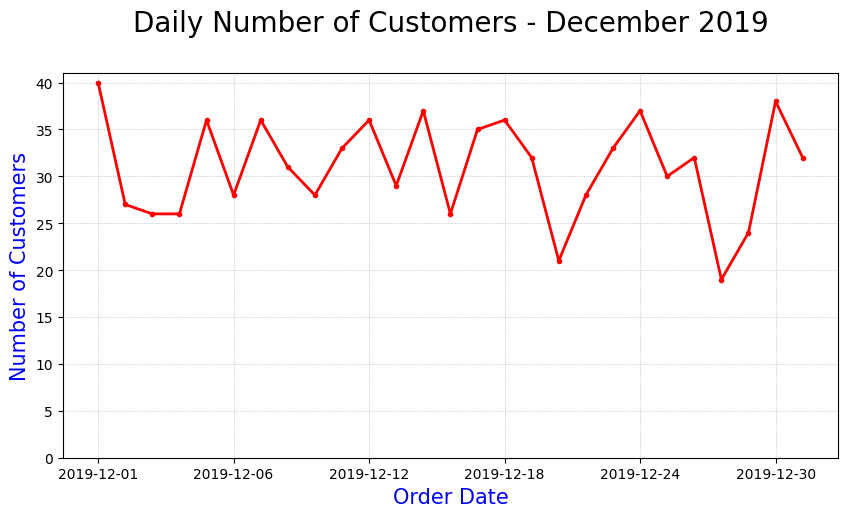

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))

dataset['gmv'] = dataset['item_price'] * dataset['quantity']

plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='center', pad=30, fontsize=20)
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
dataset.head(20)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000


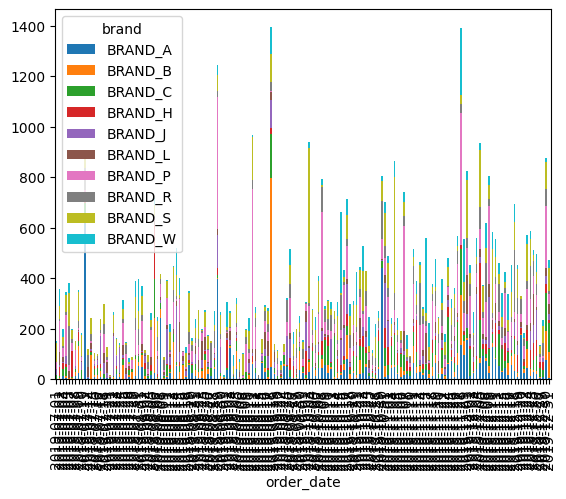

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat data dari file .csv
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Memproses data untuk mendapatkan kuantitas top brands
top_brands_quantity = dataset.groupby('brand')['quantity'].sum().nlargest(5)
max_quantity_brand = top_brands_quantity.idxmax()
max_quantity_value = top_brands_quantity[max_quantity_brand]

# Menampilkan lonjakan yang signifikan pada brand P
brand_P_data = dataset[dataset['brand'] == 'BRAND_P']
lonjakan_value = brand_P_data[brand_P_data['order_date'] == '2019-12-06']['quantity'].values[0]

# Membuat stacked bar-chart untuk top 5 brands
top_5_brands = dataset.groupby(['order_date', 'brand'])['quantity'].sum().unstack().fillna(0)
top_5_brands.plot(kind='bar', stacked=True)

# Menambahkan anotasi untuk lonjakan pada brand P
if lonjakan_value > 100:
    plt.annotate('Lonjakan!', xy=('2019-12-06', lonjakan_value), xytext=('2019-12-06', lonjakan_value+100),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

# Menampilkan grafik
plt.show()
